### imports

In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd


### hepler functions

In [2]:
def get_bpm_range(bpm_diff):
    if bpm_diff < 10:
        return 0.6
    elif bpm_diff < 20:
        return 0.4
    elif bpm_diff < 30:
        return 0.3
    elif bpm_diff < 40:
        return 0.1
    else:
        return 0.0

def get_loudness_range(loudness_diff):
    if loudness_diff < 2:
        return 0.4
    elif loudness_diff < 15:
        return 0.3
    elif loudness_diff < 35:
        return 0.2
    elif loudness_diff < 40:
        return 0.1
    else:
        return 0.0
    
def calculate_danceability(loudness_series, bpm_series):
    loudness_series = (loudness_series + 7).abs()
    bpm_series = (bpm_series - 120).abs()
    loudness_score = loudness_series.apply(get_loudness_range)
    bpm_score = bpm_series.apply(get_bpm_range)
    danceability = bpm_score + loudness_score
    return danceability

def prune_data(df):
    # Remove rows with missing values
    df = df.dropna()
    # Remove rows with invalid values
    df = df[(df['year'] > 0) & (df['year'] < 2024)]
    df = df[(df['bpm'] > 0) & (df['bpm'] < 300)]
    df = df[(df['loudness'] > -100) & (df['loudness'] < 0)]
    return df

def year_to_decade(year):
    return year - year % 10

def preprocess_data(df):
    # Calculate danceability
    new_df = prune_data(df)

    new_df['danceability'] = calculate_danceability(new_df['loudness'], new_df['bpm'])
    # Prune the data
    new_df['decade'] = new_df['year'].apply(year_to_decade)
    new_df = new_df.drop(['loudness', 'bpm', 'year'], axis=1)
    return new_df


### importing and processing the data

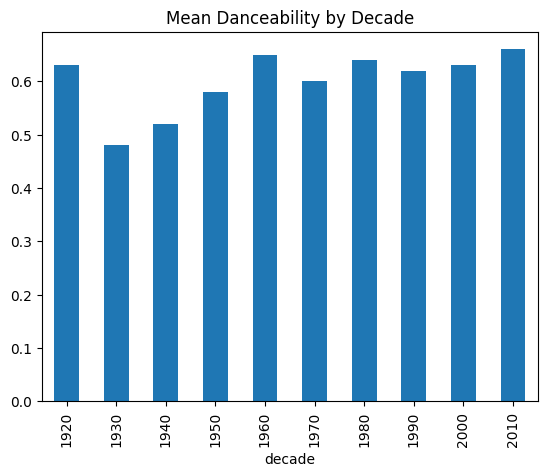

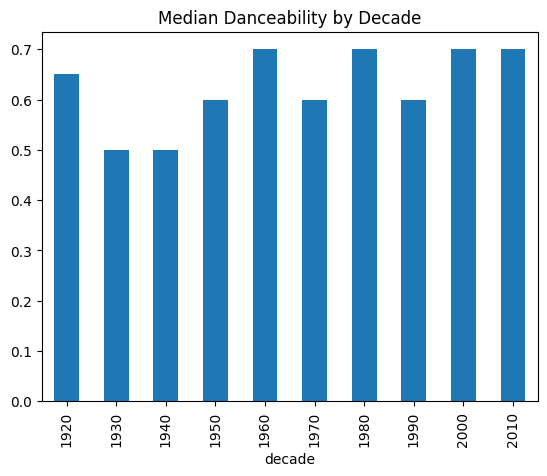

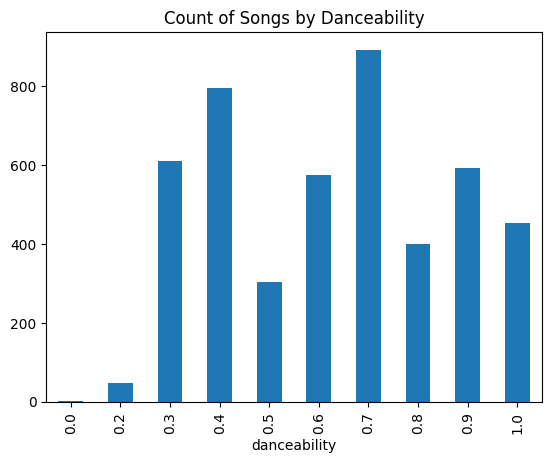

In [10]:
#creating a dataframe from the data
df = pd.read_hdf('aggregated_song_features.h5', key='data')

# Preprocess the data
new_df = preprocess_data(df)

#grouping the data by decade and calculating the mean danceability and the count of songs in each decade
grouped_decade = new_df.groupby('decade')['danceability'].agg(['mean', 'count']).round(2)

#plotting this data
grouped_decade['mean'].plot(kind='bar')
plt.title('Mean Danceability by Decade')
plt.show()

#group by decade and median danceability
grouped_decade_median = new_df.groupby('decade')['danceability'].median().round(2)

#plotting this data
grouped_decade_median.plot(kind='bar')
plt.title('Median Danceability by Decade')
plt.show()

# counting the number of songs with a specific danceability score
danceability_score_count = new_df['danceability'].round(2).value_counts().sort_index()

#plotting this data
danceability_score_count.plot(kind='bar')
plt.title('Count of Songs by Danceability')
plt.show()
